# **ML Modelling Practice**

---



First I will inport the data base and then create a dataframe from the data. I do this using code from https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI/blob/main/5_02_Modelling_Hackathon.ipynb

In [ ]:
from google.colab import files
upload = files.upload()

Saving loan_data.csv to loan_data (3).csv


In [ ]:
import pandas as pd
df = pd.read_csv("loan_data.csv")

df.head()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


The dataframe looks good and as expected. We have already been informed there are no missing values, so I will not do a check for that. All categories are numerical so there is no need for one-hot encoding. The Y-value is 'loan_status' so I will create a new variable from it and then separate it from the main data. I will do this using code from https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI/blob/main/5_02_Modelling_Hackathon.ipynb

In [ ]:
Y_values = df[['loan_status']].values.ravel() # change to list

Y_values

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
X_values = df.drop(['loan_status'], axis=1)
X_values.head()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522


Now the Y and X values have been separated, I can now scale X, using code from the same github link as before.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data and convert back to DataFrame
X_values = pd.DataFrame(scaler.fit_transform(X_values), columns=X_values.columns)
X_values

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,0.423077,0.431078,0.045017,0.685259,0.176667,0.002983,0.065897,0.0,0.000000,0.00,0.001005,0.648235,0.527569,0.007526,0.007530
1,0.288462,0.182957,0.119519,0.555777,0.116667,0.000563,0.100990,0.0,0.111111,0.00,0.530653,0.476471,0.478697,0.616658,0.615964
2,0.461538,0.027569,0.024851,0.679283,0.280000,0.000057,0.047721,0.0,0.000000,0.00,0.016080,0.725294,0.469925,0.046663,0.046687
3,0.673077,0.012531,0.060200,0.685259,0.326667,0.004933,0.070693,0.0,0.111111,0.00,0.024121,0.749412,0.496241,0.045660,0.045181
4,0.269231,0.313283,0.207051,0.561753,0.240000,0.000697,0.075721,0.0,0.000000,0.00,0.995980,0.465882,0.241855,0.781234,0.781627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.326923,0.107769,0.104038,0.442231,0.543333,0.003757,0.046030,0.0,0.000000,0.00,0.425126,0.900588,0.238095,0.540391,0.540663
49996,0.307692,0.110276,0.023387,0.645418,0.420000,0.004927,0.038069,1.0,0.000000,0.00,0.033166,0.710000,0.380952,0.088811,0.088855
49997,0.442308,0.120301,0.015928,0.739044,0.336667,0.000057,0.062903,0.0,0.000000,0.00,0.175879,0.673529,0.687970,0.477672,0.477410
49998,0.384615,0.010025,0.009574,0.567729,0.043333,0.000017,0.047273,0.0,0.000000,0.25,0.009045,0.512353,0.562657,0.036628,0.036145


Looks as expected. Now I can split the data into training and test data (once again using code from the same link as before)

In [ ]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_values, Y_values, test_size = 0.2, random_state=1984, stratify=Y_values)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40000, 15)
(10000, 15)
(40000,)
(10000,)


The shapes of training and test data look as expected. Now I can start modelling. I will set up with default hyperparameters to compare performance on the training data. I am using code from https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI/blob/main/5_01_Random_Forest_and_GBDT.ipynb

In [ ]:
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from xgboost import XGBClassifier as XGB
from sklearn.metrics import precision_recall_fscore_support

LogR_algo = LogR()
LogR_model = LogR_algo.fit(X_train, Y_train)

RF_algo = RF()
RF_model = RF_algo.fit(X_train, Y_train)

GBDT_algo = GBDT()
GBDT_model = GBDT_algo.fit(X_train, Y_train)

XGB_algo = XGB()
XGB_model = XGB_algo.fit(X_train, Y_train)

models = [LogR_model, RF_model, GBDT_model, XGB_model]
names = ['Logistic Regression', 'Random Forest', 'GBDT', 'XGBDT']

for i in range(4):
  print(f"Model: {names[i]}")

  # predict based on training data
  predict = models[i].predict(X_train)

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(Y_train, predict, average='macro')
  print(f"Macro Precision: {precision}")
  print(f"Macro Recall: {recall}")
  print(f"Macro F1-score: {f1_score}")
  print("\n")

Model: Logistic Regression
Macro Precision: 0.837464053030124
Macro Recall: 0.8346661525121573
Macro F1-score: 0.8358040375954495


Model: Random Forest
Macro Precision: 0.9999772923384349
Macro Recall: 0.9999721944166389
Macro F1-score: 0.9999747427331261


Model: GBDT
Macro Precision: 0.8928781013606917
Macro Recall: 0.8895343956707891
Macro F1-score: 0.8909143110334385


Model: XGBDT
Macro Precision: 0.9382977897947345
Macro Recall: 0.9361121474114884
Macro F1-score: 0.9370868743383247




The models score quite well across the board, with Random Forest scoring (almost) perfectly. Therefore, I will check for overfitting by tuning the hyperparameters and score the Random Forest model again on the training data. I used AI to do this, using the prompt "tune the hyperparameters for the Random Forest Model".

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

# optimized random hyperparameter search
def random_search(algo, hyperparameters, X_train, Y_train):
    clf = RandomizedSearchCV(
        algo,
        hyperparameters,
        cv=3,
        random_state=2015,
        scoring='precision_macro',
        n_iter=10,
        n_jobs=-1,
        refit=True
    )
    clf.fit(X_train, Y_train)
    return clf.best_params_

# Random Forest hyperparameter space (optimized)
RF_tuned_parameters = {
    'n_estimators': randint(100, 250),
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 10),
    'max_features': ['sqrt', 'log2']
}

# Search best params
RF_base = RandomForestClassifier(random_state=2015)
RF_best_params = random_search(RF_base, RF_tuned_parameters, X_train, Y_train)

# Final model training
RF_model = RandomForestClassifier(**RF_best_params, random_state=2015)
RF_model.fit(X_train, Y_train)

# Metrics
pred = RF_model.predict(X_train)
precision, recall, f1, _ = precision_recall_fscore_support(
    Y_train, pred, average='macro'
)

print("Random Forest Overfitting Check:")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")


Random Forest Overfitting Check:
Precision: 0.893
Recall:    0.888
F1 Score:  0.890


These values look better and less likelihood for overfitting. After fine tuning the hyperparameters, I will now score the models on the test data, interpret my findings, and then draw final conclusions.

In [ ]:
for i in range(4):
  print(f"Model: {names[i]}")

  # predict based on TEST data
  predict = models[i].predict(X_test)

  # Calculate precision, recall, and F1-score
  precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, predict, average='macro')
  print(f"Macro Precision: {precision}")
  print(f"Macro Recall: {recall}")
  print(f"Macro F1-score: {f1_score}")
  print("\n")

Model: Logistic Regression
Macro Precision: 0.8398636425018216
Macro Recall: 0.8373653640789696
Macro F1-score: 0.8384029982671206


Model: Random Forest
Macro Precision: 0.8834684483439499
Macro Recall: 0.8825259471872572
Macro F1-score: 0.882967598988043


Model: GBDT
Macro Precision: 0.8873781134330483
Macro Recall: 0.8843639971347719
Macro F1-score: 0.8856235772150971


Model: XGBDT
Macro Precision: 0.8902565384475918
Macro Recall: 0.8883908753191305
Macro F1-score: 0.889220287422926




Each model scores reasonably well. Random Forest scores have decreased, which also means liklihood of overfitting the model is lower. Now, I will test the models on the test data, interpret the findings, and draw final conclusions. I am using code from: https://github.com/MJMortensonWarwick/IB2AD0_Data_Science_GenerativeAI/blob/main/5_01_Random_Forest_and_GBDT.ipynb

I want to look further at the accuracy of each model, so I will generate a confusion matrix for each model.

Logistic Regression Confusion Matrix


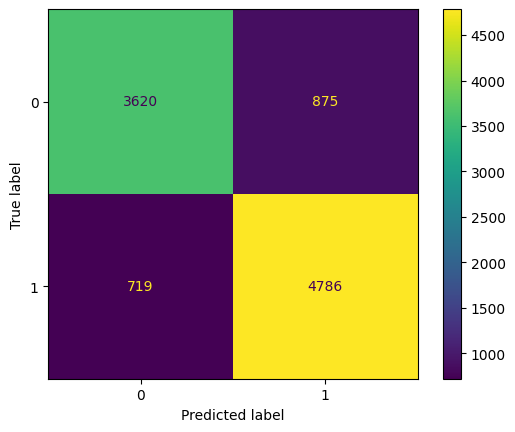

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as CM

# Logistic Regression
print("Logistic Regression Confusion Matrix")
predict = LogR_model.predict(X_test)
CM.from_predictions(Y_test, predict)

The logistic regression model is more likely to predict a false positive (incorrectly predict a value of 1 when it should be 0). This could raise a problem considering we are talking about loan approvals - these false positives represent risk exposure as it approves loans that should not be approved.

The model also predicts a reasonble number of false negatives (incorrectly predict a value of 0 when it should be 1). This can also pose a problem as they represent missed opportunities to approve safe loans. Although this value of false negatives is smaller than the number of false positives, it would still be beneficial to reduces these numbers, and increase the correct classifications (true positives and true negatives).

Random Forest Confusion Matrix


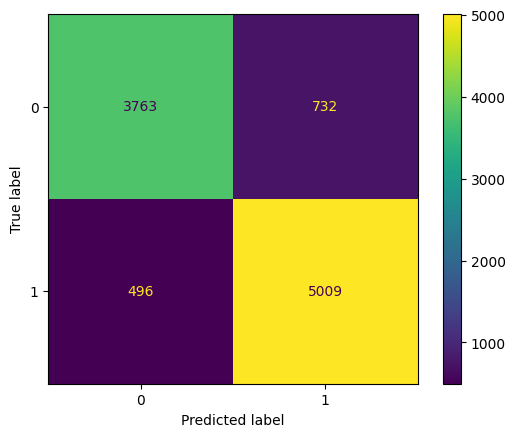

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay as CM

# Random Forest
print("Random Forest Confusion Matrix")
predict = RF_model.predict(X_test)
CM.from_predictions(Y_test, predict)

Random Forest Model is better than the logistic regression model in terms of correct classifcations of whether a loan should be approved or not (higher number of TP and TN and lower number of FN and FP). Now I will check GBDT and xGBDT.

GBDT Confusion Matrix


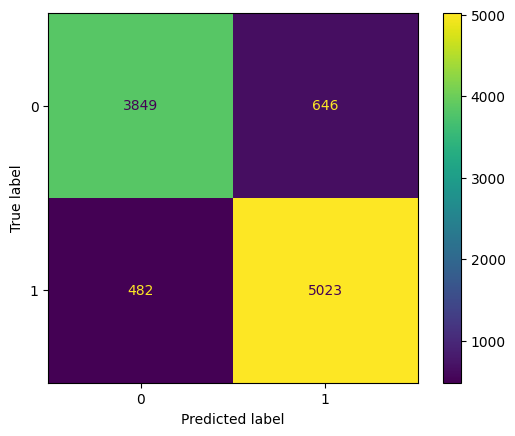

In [ ]:
# Gradient Boosting Decision Trees
print("GBDT Confusion Matrix")
predict = GBDT_model.predict(X_test)
CM.from_predictions(Y_test, predict)


XGBDT Confusion Matrix


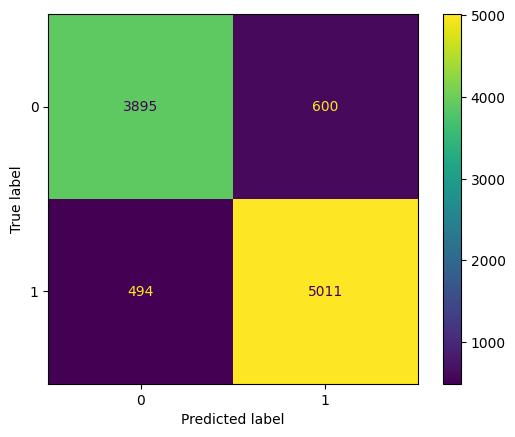

In [ ]:
# eXtreme Gradient Boosting Decision Trees
print("XGBDT Confusion Matrix")
predict = XGB_model.predict(X_test)
CM.from_predictions(Y_test, predict)

Random forest, GBDT, and xGBDT are better at minimising FP and better at correct classification (TP and TN)than logistic regression.

Logistic regression model is the weakest of the four, considering it predicts the highest number of false positives. From a business/lender perspective, this model increases risk and may cause financial losses by approving risky loans. Lenders would care more about minimising FP than FN.



I will now look at the clsssification report for each model and draw final conclusions.

In [ ]:
from sklearn.metrics import classification_report

for i in range(4):
  # predict based on TEST data
  predict = models[i].predict(X_test)
  print(f"Model: {names[i]} - Classification Report:")
  print(classification_report(Y_test, predict, target_names=["Class 0 (Maj)", "Class 1 (Min)"]))
  print("\n")

Model: Logistic Regression - Classification Report:
               precision    recall  f1-score   support

Class 0 (Maj)       0.83      0.81      0.82      4495
Class 1 (Min)       0.85      0.87      0.86      5505

     accuracy                           0.84     10000
    macro avg       0.84      0.84      0.84     10000
 weighted avg       0.84      0.84      0.84     10000



Model: Random Forest - Classification Report:
               precision    recall  f1-score   support

Class 0 (Maj)       0.88      0.86      0.87      4495
Class 1 (Min)       0.89      0.90      0.90      5505

     accuracy                           0.88     10000
    macro avg       0.88      0.88      0.88     10000
 weighted avg       0.88      0.88      0.88     10000



Model: GBDT - Classification Report:
               precision    recall  f1-score   support

Class 0 (Maj)       0.89      0.86      0.87      4495
Class 1 (Min)       0.89      0.91      0.90      5505

     accuracy               

**Conclusions:**
From the classification report, I can conclude that both GBDT and XGBDT models are the top performers, demonstrating excellent classification capabilities with very similar metrics. They significantly outperform Logistic Regression(which is the lowest performance among the four models) and show a slight edge over the default Random Forest model. Therefore the model rankings is:

1. xGBDT/GBDT
2. Random Forest
3. Logistic Regression

The high F1-scores for both classes in GBDT and XGBDT suggest that these models are robust and generalize well to the test data without significant issues like class imbalance impacting their predictive power for either class.

Looking at the recall and precision for the two classes, a high recall for class 1 means that fewer good borrowers are wrongly rejected. high precision for class 1 means approved borrowers are likely to repay (lower risk). xGBT has the best balance across both classes:

*   Class 1 recall = 0.91 (highest)
*   Class 1 precision = 0.89

This means xGBDT model has the highest ability to identify creditworthy applicants (GBDT being a close second). This is what lenders would look for in credit scoring and deciding who to lend to.

By contrast, logistic regression is the lowest performing model


*   Class 1 recall = 0.87 (some good applicants getting wrongly rejected)
*   Class 1 precision = 0.85 (some approved loans are risky)


Looking at this from an organisational perspective, there's profit loss due to unnecessary rejections and more risk from misapproved loans.



The Random Forest model also performs well, but GBDT and XGBDT appear to be marginally superior for this dataset with default hyperparameters.


**Next steps:**
The next step will be to fine-tune the Random Forest model further to see if its performance can match or exceed that of GBDT and XGBDT. Additionally, I could also perform deeper validation on an unseen dataset to ensure the results I observed are reliable and generalize to new data.